# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Library for splitting data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set limits on number of displayed columns and rows
pd.set_option("display.max_columns", None)  # no maximum limit
pd.set_option("display.max_rows", 200)  # maximum of 200 rows

# Library for building and showing decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Library for Bagging ensemble technique
from sklearn.ensemble import BaggingClassifier

# Library for Random Forest ensemble technique
from sklearn.ensemble import RandomForestClassifier

# Library for AdaBoost ensemble technique
from sklearn.ensemble import AdaBoostClassifier

# Library for Gradient Boosting ensemble technique
from sklearn.ensemble import GradientBoostingClassifier

# Library for XGBoost ensemble technique
from xgboost import XGBClassifier

# Library for Stacking ensemble technique
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries for calculating different metric scores
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, make_scorer, confusion_matrix)

## Data Overview

- Observations
- Sanity checks

In [4]:
df_orig = pd.read_csv('/content/drive/MyDrive/Ensemble Techniques/EasyVisa.csv')

df_0 = df_orig.copy()

In [5]:
print(
    f"There are {df_0.shape[0]} rows and {df_0.shape[1]} columns in the original data frame."
)

There are 25480 rows and 12 columns in the original data frame.


In [6]:
df_0.sample(10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


###Observations

- The column names all seem fine and do not need modification.
- The column case_id could be removed, as it does not contain any data usable in the prediction models.
- The values in the columns has_job_experience, requires_job_training, and full_time_poistion are Y or N, so they could be encoded as 1 and 0, respectively.
- The education levels stored in the column education_of_employee could be replaced with ordinal integer values.
- The variable yr_of_estab is hard to interpret, so it could be transformed into years since establishment.
- The unit of prevaliling_wage is not constant, so it would make this parameter more interpretable if its unit is made constant. This will reduce the number of independent variables as unit_of_wage will be removed.

In [ ]:
dplct_no = df_0.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data.")

There are 0 duplicate rows in the data.


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


###Observations

- Considering that the total of rows is 25480, none of the columns have null/missing values.
- Among the 11 columns of data (excluding case_id), 3 are of numeric type and the remaining 8 are of non-numeric type.
 - Numeric:
   - Integer: no_of_employees and yr_of_estab
   - Float: prevailing_wage
 - Non-numeric:
   - Object: continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, and case_status

In [ ]:
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


###Observations

- The mean and median values of no_of_employees are 5667 and 2109, respectively, implying a right-skewed distribution.
- The maximum value of no_of_employees is above 600000, which is quite high but possible.
- The minimum value of no_of_employees is -26, i.e., negative, which is unreasonable. The negative values should be treated as missing values.
- The oldest and newest employers have been established since (yr_of_estab =) 1800 and 2016, respectively.
- The distribution of prevailing_wage is difficult to interpret at this point, because its unit varies across the rows. However, the minimum value is above zero, which is reasonable.

In [ ]:
df_0.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
cat_cols = df_0.select_dtypes(include="object").columns  # columns of object data type

for col in cat_cols:
    print("Unique values in the column", col, "are:")
    print(df_0[col].value_counts())
    print("=" * 60)

Unique values in the column case_id are:
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
Unique values in the column continent are:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Unique values in the column education_of_employee are:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Unique values in the column has_job_experience are:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
Unique values in the column requires_job_training are:
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Unique values in the column region_of_employment are:
Northeast    7195
South        7017
West         6586
Midwest      4307
I

###Observations

- The majority of employees are from Asia.
- The majority of employees have a Bachelor's degree.
- Most of the employees have job experience.
- The vast majority of the jobs do not require training.
- The regions Northeast, South, and West need most of the employees.
- The available units for wage are Year, Hour, Week, and Month. The majority of the wage values in the data are per year.
- The vast majority of the applications are for full-time positions.
- Near 2/3 of the visa applications are certified.

In [ ]:
df_0.drop("case_id", axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [7]:
def histogram_boxplot(
    data, feature, xlabel, ylabel, figsize=(8, 6), kde=False, bins=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    figsize: size of figure (default (8, 6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Set2"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

    ax_box2.set_xlabel("", fontsize=16)  # remove label of 1st x-axis
    ax_hist2.set_xlabel(xlabel, fontsize=16)  # set 2nd x-axis label
    ax_hist2.set_ylabel(ylabel, fontsize=16)
    # set y-axis label

In [8]:
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage to the left

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 0.5 * count + 1))
    else:
        plt.figure(figsize=(8, 0.5 * n + 1))

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_width() / total
            )  # percentage of each class of the category
        else:
            label = p.get_width()  # count of each level of the category

        y = p.get_y() + p.get_height() / 2
        x = p.get_width()

        ax.annotate(
            label,
            (x, y),
            ha="left",
            va="center",
            size=12,
            xytext=(0, 0),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_xlabel(xlabel, fontsize=16)  # set x-axis label
    ax.set_ylabel(ylabel, fontsize=16)  # set y-axis label

    plt.show()

**Continent of Origin**

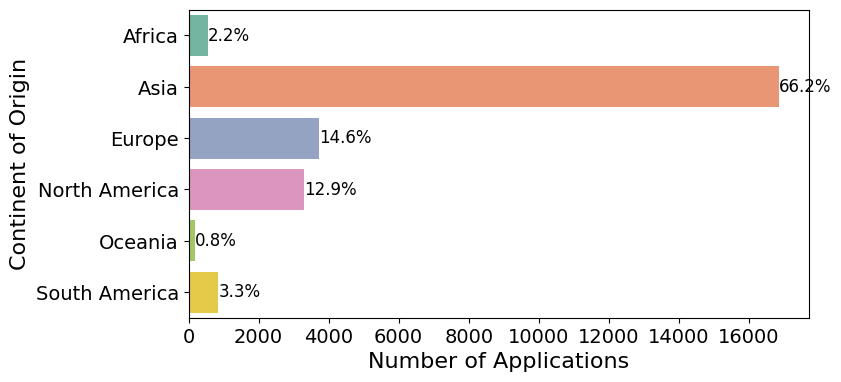

In [9]:
labeled_barplot(
    data=df_0,
    feature="continent",
    xlabel="Number of Applications",
    ylabel="Continent of Origin",
    perc=True,
)

###Observations

- The majority (66%) of the visa applicants are from Asia, which makes sense given the high population of this continent.
- The lowest fraction (<1%) of the applicants are from Oceania, which also makes sense given its very low population.
- North America and Europe have close number of applicants (12.9% and 14.6%).

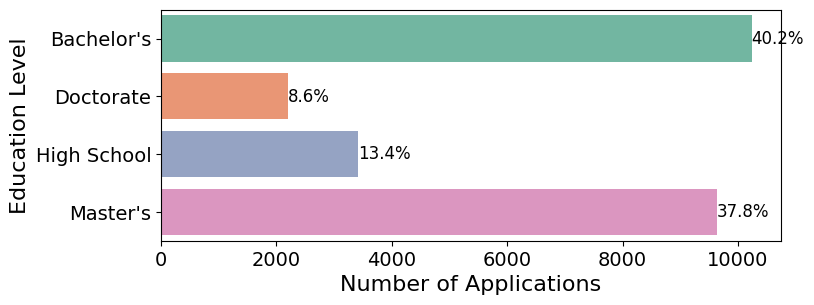

In [ ]:
labeled_barplot(
    data=df_0,
    feature="education_of_employee",
    xlabel="Number of Applications",
    ylabel="Education Level",
    perc=True,
)

###Observations

- The majority of the applicants have either bachelor's degrees (40.2%) or master's degrees (37.8%).
- Only 8.6% of the applicants have doctorate degrees.

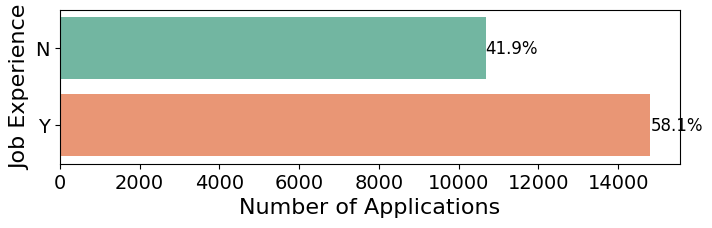

In [ ]:
labeled_barplot(
    data=df_0,
    feature="has_job_experience",
    xlabel="Number of Applications",
    ylabel="Job Experience",
    perc=True,)

###Observations

- More than half (58%) of the applicants have job experience.

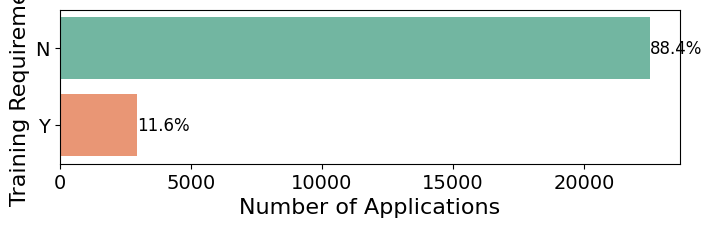

In [ ]:
labeled_barplot(
    data=df_0,
    feature="requires_job_training",
    xlabel="Number of Applications",
    ylabel="Training Requirement",
    perc=True,
)

###Observations

- The vast majority (>88%) of the jobs do not require the applicants to receive training.

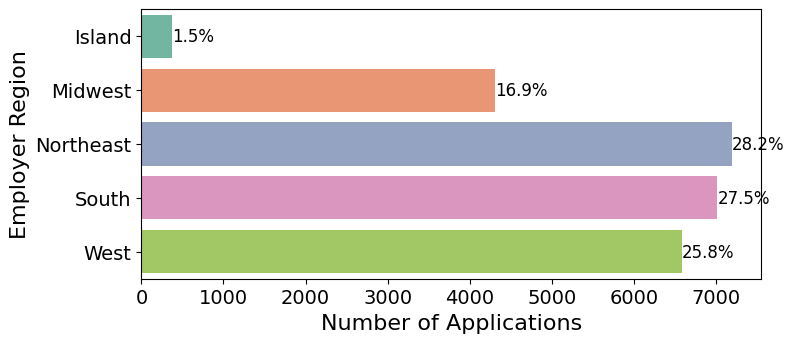

In [ ]:
labeled_barplot(
    data=df_0,
    feature="region_of_employment",
    xlabel="Number of Applications",
    ylabel="Employer Region",
    perc=True,
)

###Observations

- Most of the applications are for employment in the Northeast, South, and West regions of the United States. This could be expected because the majority of the tech companies are in those regions and the populations of those regions are higher than the other regions of the United States.
- The Island region has the lowest number (1.5%) of work visa applicants.

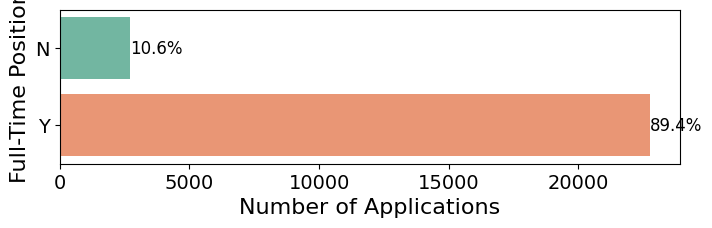

In [ ]:
labeled_barplot(
    data=df_0,
    feature="full_time_position",
    xlabel="Number of Applications",
    ylabel="Full-Time Position",
    perc=True,
)

###Observations
- More than 89% of the applications are related to full-time employment.

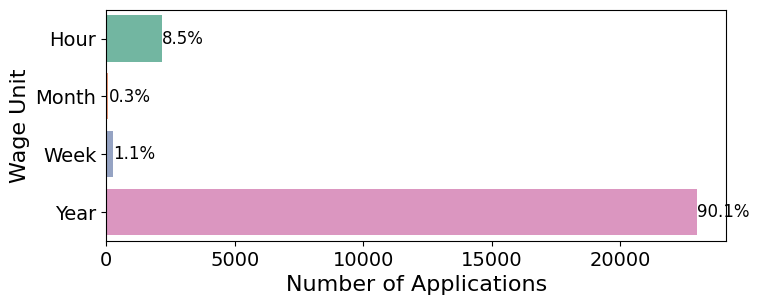

In [ ]:
labeled_barplot(
    data=df_0,
    feature="unit_of_wage",
    xlabel="Number of Applications",
    ylabel="Wage Unit",
    perc=True,
)

###Observations
- The dominant majority (90%) of the applications are for the jobs whose prevailing wages are computed per year.

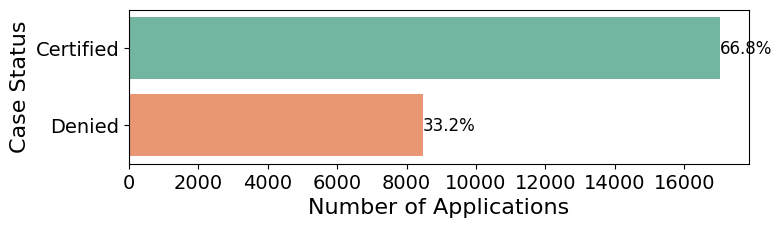

In [ ]:
labeled_barplot(
    data=df_0,
    feature="case_status",
    xlabel="Number of Applications",
    ylabel="Case Status",
    perc=True,
)

###Observations
- Almost two-thirds of the visa applications are certified.

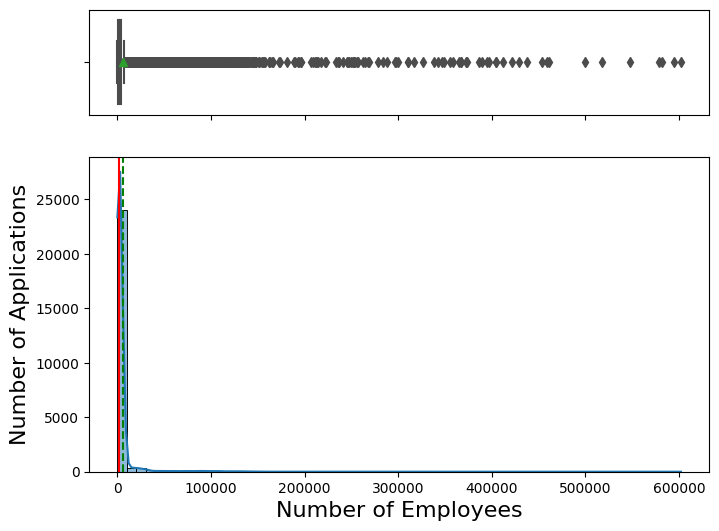

In [ ]:
histogram_boxplot(
    data=df_0,
    feature="no_of_employees",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

###Observations
- There is a large variation in the number of employees of the employers.
- The distribution is highly right-skewed.
- Not all the detected outliers per 1.5-IQR rule shall be treated as outliers, because, in 2016, there existed employers in the United States that actually had hundreds of thousands of employees. Here, per the shown distribution, a cut-off value of 450000 is considered for the number of employees.

#Bivariate Analysis

Since the ultimate goal of this project is producing models to predict employment visa certification, the focus of the bivariate analyses will be on the effects of different independent variables on the target variable, i.e., case_status.

In [10]:
def stacked_barplot(data, predictor, target, xlabel, ylabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    xlabel: label of x-axis
    ylabel: label of y-axis
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 2, 4))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

In [11]:
def distribution_plot_wrt_target(data, predictor, target, plabel, tlabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    plabel: label of predictor axes
    tlabel: label of target axes
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_title("Distribution of predictor for target = " + str(target_uniq[0]))
    axs[0, 0].set_xlabel(plabel, fontsize=16)
    axs[0, 0].set_ylabel("Density", fontsize=16)

    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of predictor for target = " + str(target_uniq[1]))
    axs[0, 1].set_xlabel(plabel, fontsize=16)
    axs[0, 1].set_ylabel("Density", fontsize=16)

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")
    axs[1, 0].set_xlabel(tlabel, fontsize=16)
    axs[1, 0].set_ylabel(plabel, fontsize=16)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    axs[1, 1].set_xlabel(tlabel, fontsize=16)
    axs[1, 1].set_ylabel(plabel, fontsize=16)

    plt.tight_layout()
    plt.show()

**Case Status vs. Education Level**

Leading Question: Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


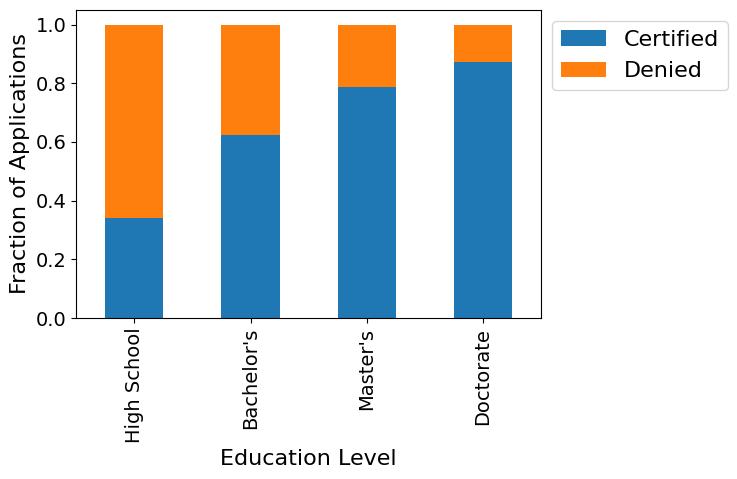

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="education_of_employee",
    target="case_status",
    xlabel="Education Level",
    ylabel="Fraction of Applications",
)

###Observations
- It is clear that the higher the education level of an applicants is, the more their chances of visa certification are.
- More specifically, while the visa certification likelihood of the applicants of a doctorate degree is 87%, this likelihood is only 34% for the applicants of high school education.

**Case Status vs. Continent of Origin**

Leading Question: How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


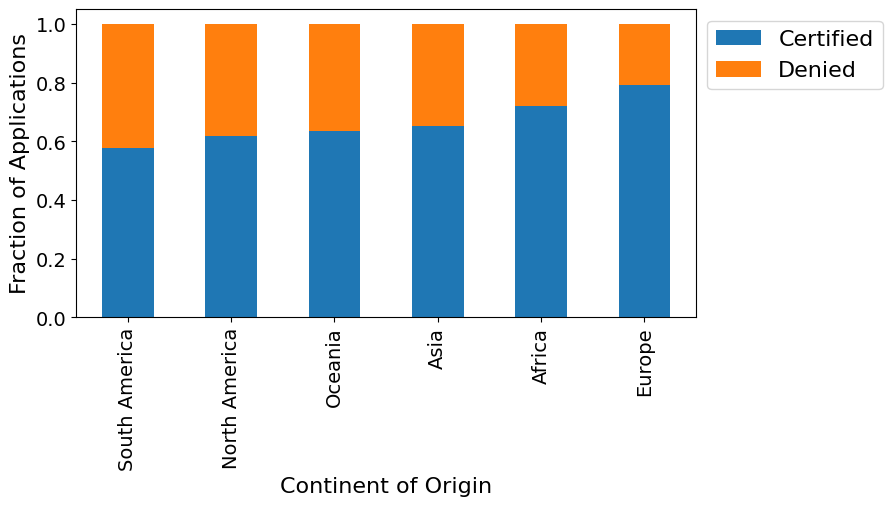

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="case_status",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

###Observations
- Among different continents, Europe has the highest work visa certification rate (79%).
- The lowest work visa certification rate belongs to South America (58%).

**Case Status vs. Job Experience**

Leading Question: Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


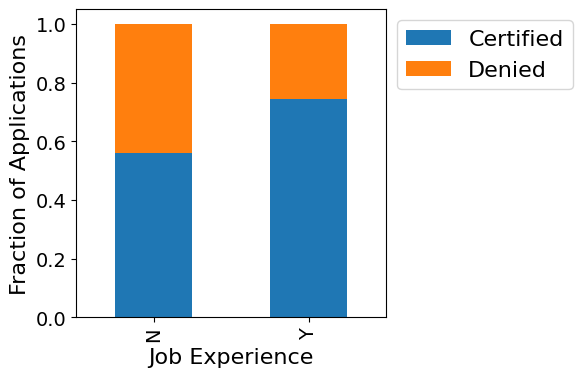

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="has_job_experience",
    target="case_status",
    xlabel="Job Experience",
    ylabel="Fraction of Applications",
)

###Observations
- Having job experience is found to have a positive effect on the visa certification likelihood.
- More specifically, about 74% of the experienced applicants are granted visas, while this percentages is only 56% for the inexperienced applicants.

**Case Status vs. Job Training Requirement**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


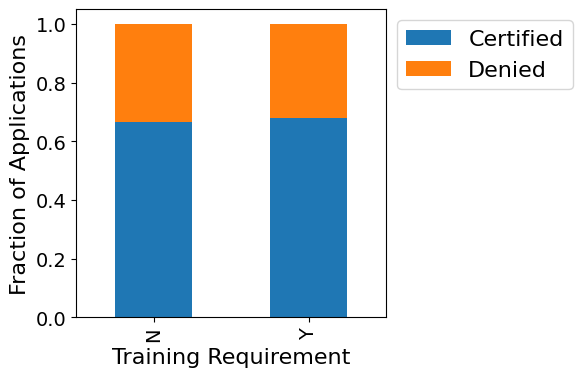

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="requires_job_training",
    target="case_status",
    xlabel="Training Requirement",
    ylabel="Fraction of Applications",
)

###Observations
- The visa certification likelihood is found nearly unaffected by the job training requirement.

**Case Status vs. Employer Region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


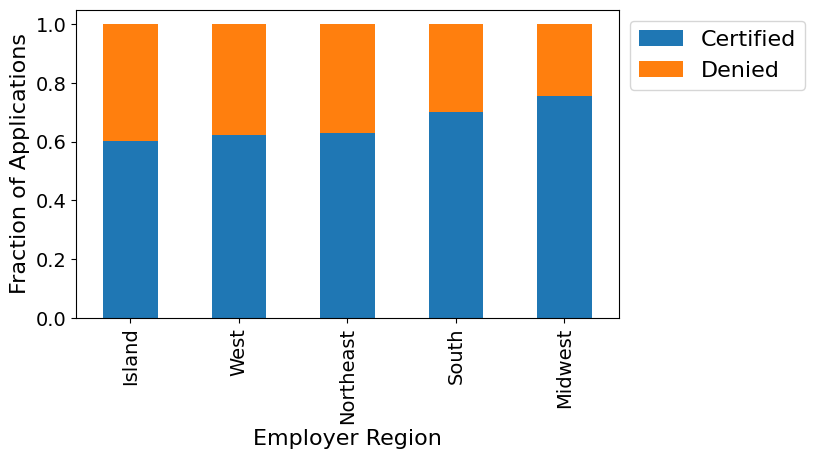

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="region_of_employment",
    target="case_status",
    xlabel="Employer Region",
    ylabel="Fraction of Applications",
)

###Observations
- It appears that the visa applications filed by the employers within the Midwest region have the highest probability (~76%) of certification.
- The employers located in the Northeast, West, and Island regions have lower chances (60-63%) of visa certification.

**Case Status vs. Position Type**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


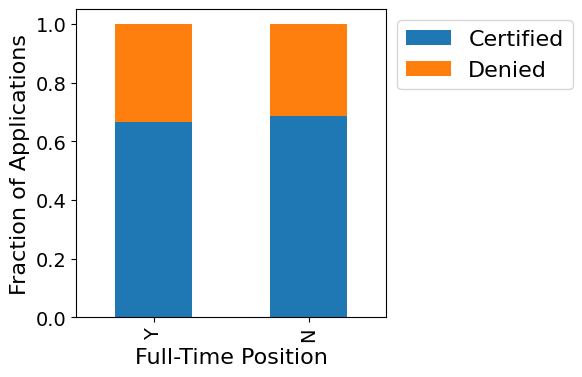

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="full_time_position",
    target="case_status",
    xlabel="Full-Time Position",
    ylabel="Fraction of Applications",
)

###Observations
- Visa certification seems to be unaffected by whether a position is full-time or part-time.

**Case Status vs. Wage Unit**

Leading Question: In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


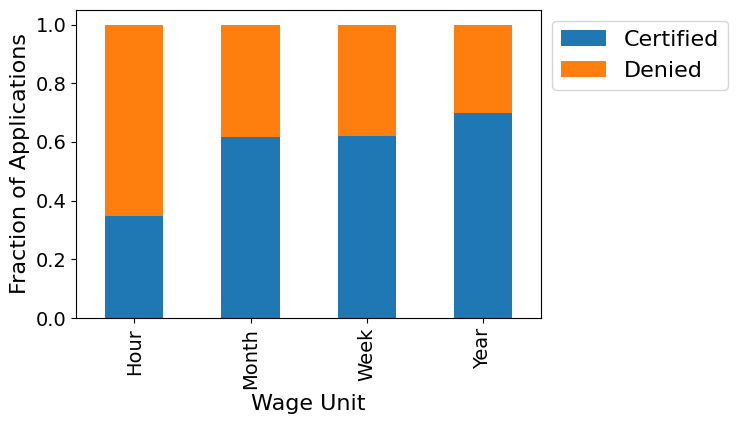

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="unit_of_wage",
    target="case_status",
    xlabel="Wage Unit",
    ylabel="Fraction of Applications",
)

###Observations

- Those applicants whose wage unit is year are more likely than other applicants to be certified for a visa (~70% likelihood).
- The applicants who are paid by hour are the least likely to be certified for a visa (~35% likelihood). This could be predicted, because hourly jobs are usually less important for the growth of the United States and they could be done by normal American workers.

**Case Status vs. Number of Employees**

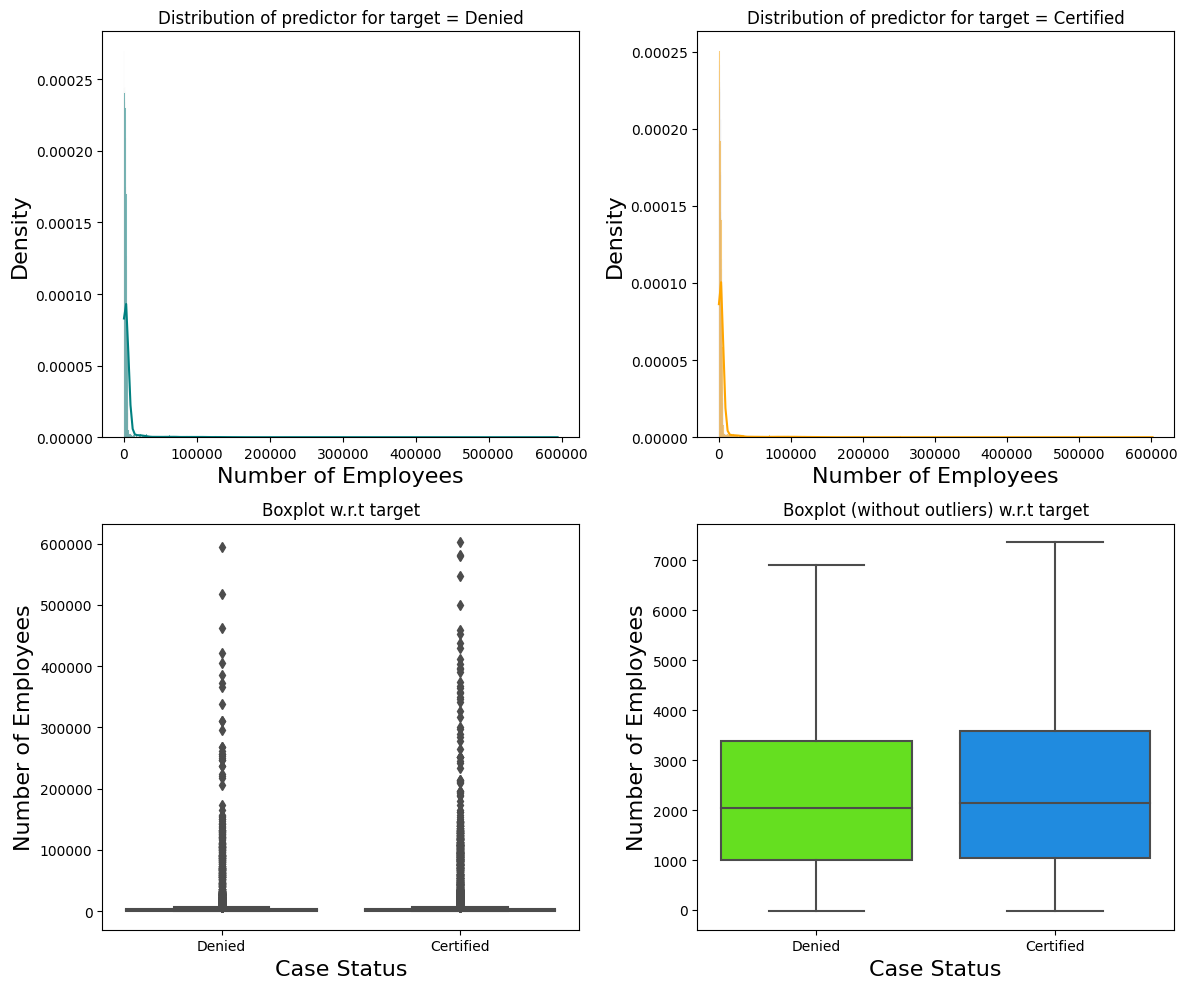

In [ ]:
distribution_plot_wrt_target(
    data=df_0,
    predictor="no_of_employees",
    target="case_status",
    plabel="Number of Employees",
    tlabel="Case Status",
)

###Observations
- A very small difference is observed between the distributions of the employer's number of employees for those applications that are denied and those that are certified. As a result, it seems that the number of employees has insignificant effect on the likelihood of visa certification.

**Training Requirement vs. Job Experience**

Text(0.5, 14.722222222222216, 'Training Requirement')

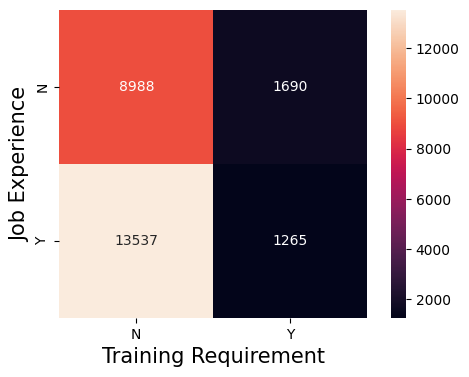

In [ ]:
pt = df_0.pivot_table(
    values="case_status",
    index="has_job_experience",
    columns="requires_job_training",
    aggfunc="count",
)

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pt, square=True, annot=True, fmt="g")
plt.ylabel("Job Experience", fontsize=15)
plt.xlabel("Training Requirement", fontsize=15)

###Observations
- Reasonably, a higher percentage of the applicants who have no job experience require job training than the applicants who have job experience (16% vs. ~9%).

**Job Training Requirement vs. Continent**

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


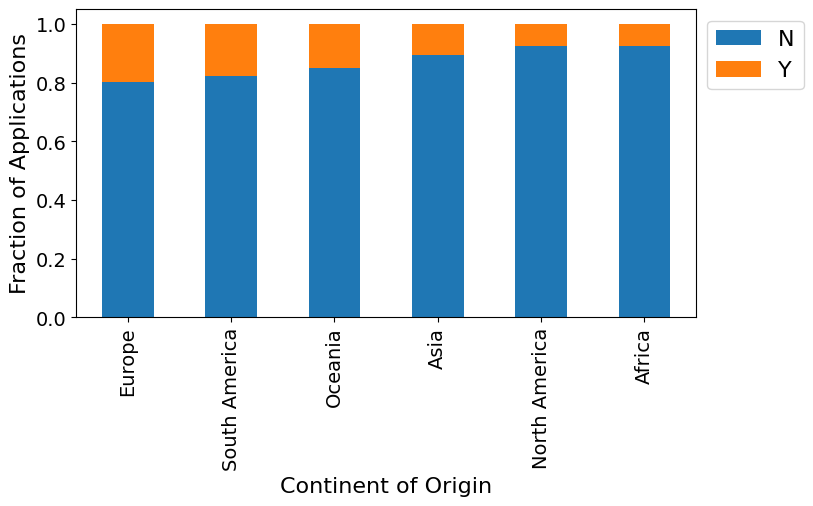

In [ ]:
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="requires_job_training",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

###Observations
- Among the applicants from different continents, a smaller ratio of those from Africa and North America need training than those from other continents.
- The highest ratio of the applicants who need training belongs to those from Europe.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [12]:
df_1 = df_0.copy()

In [13]:
neg_employee_no_rows = df_1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
df_1.loc[neg_employee_no_rows, "no_of_employees"] = df_1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {df_1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


In [14]:
df_1["yrs_snc_estab"] = 2016 - df_1.yr_of_estab

# Drom yr_of_estab
df_1.drop("yr_of_estab", axis=1, inplace=True)

# Create a column including equivalent hourly wages - it is assumed that:
# A year includes 2080 work-hours
# A month includes 173 work-hours
# A week includes 40 work-hours
df_1["hourly_wage"] = df_1["prevailing_wage"]
df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# Drom yr_of_estab
df_1.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
df_1.sample(10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,EZYV17640,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,Certified,24,12.905245
23951,EZYV23952,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,Certified,78,31.932683
8625,EZYV8626,Asia,Master's,N,N,2635,South,Hour,Y,Certified,11,887.292100
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,Certified,30,23.767212
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,West,Year,Y,Denied,88,23.973649
3433,EZYV3434,Asia,Bachelor's,Y,N,222,South,Hour,Y,Certified,27,813.726100
24440,EZYV24441,Europe,High School,N,Y,3278,South,Year,Y,Denied,22,98.532880
12104,EZYV12105,Asia,Master's,Y,N,1359,West,Year,N,Certified,19,97.229346
15656,EZYV15657,Asia,Bachelor's,N,N,2081,West,Year,Y,Denied,13,53.708183
23110,EZYV23111,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,Denied,18,444.825700


In [15]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.797645,22877.372247,12.000000,1028.00000,2109.000000,3504.000000,602069.00000
yrs_snc_estab,25480.0,36.590071,42.366929,0.000000,11.00000,19.000000,40.000000,216.00000
hourly_wage,25480.0,94.902995,278.176919,0.048077,22.64806,39.826663,60.012036,7004.39875


###Observation

- The mean and median values of yrs_snc_estab are ~37 and 19 years, respectively. The oldest employer was established 216 years before the data collection.
- The minimum and maximum values of hourly_wage are 0.05 and ~7004 (probably in dollars), respectively, so the variation of this variable is very large. The mean hourly wage is ~95.

###Detection of Outliers

Initially, the 1.5-IQR rule is used to detect potential outliers. However, it is noted that all the values detected as outlier by this method are not always outliers.

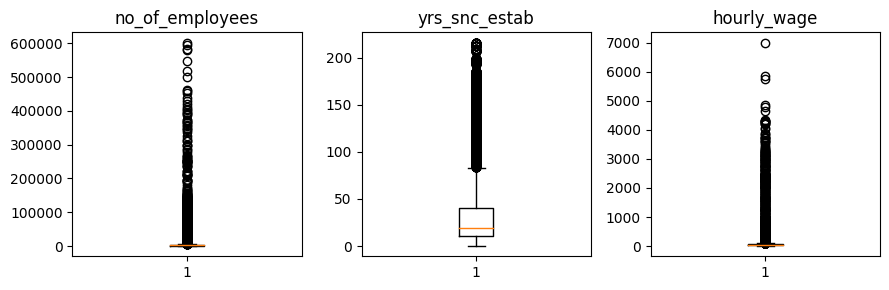

In [16]:
num_cols = df_1.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###Observations

- Given the discussions provided in the initial EDA section, not all the outliers detected based on the 1.5-IQR rule are actual outliers. Here, merely to remove very large infrequent values, the following maximum cut-off values are considered for the above three variables:
 - no_of_employees: 450000
  - yrs_snc_estab: 200
  - hourly_wage: 4000

###Treatment of Outliers

- The detected upper outliers are replaced with the maximum values of the respective columns in the absence of the outliers.


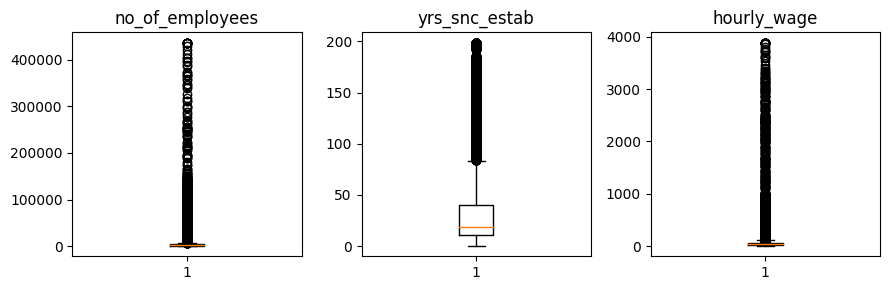

In [17]:
df_1.loc[df_1.no_of_employees > 450000, "no_of_employees"] = df_1[
    df_1.no_of_employees <= 450000
].no_of_employees.max()

# Replace outliers in yrs_snc_estab
df_1.loc[df_1.yrs_snc_estab > 200, "yrs_snc_estab"] = df_1[
    df_1.yrs_snc_estab <= 200
].yrs_snc_estab.max()

# Replace outliers in hourly_wage
df_1.loc[df_1.hourly_wage > 4000, "hourly_wage"] = df_1[
    df_1.hourly_wage <= 4000
].hourly_wage.max()

# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###Secondary EDA

- The focus of the secondary EDA is on the new variables created in the section Data Preprocessing, while correlation coefficients between the final numeric variables are also examined.

## Building bagging and boosting models

###Univariate Analysis

Years Since Establishment

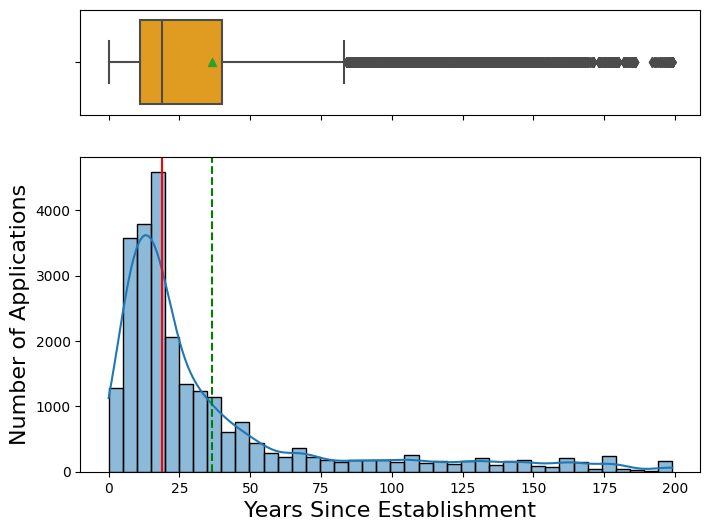

In [18]:
histogram_boxplot(
    data=df_1,
    feature="yrs_snc_estab",
    xlabel="Years Since Establishment",
    ylabel="Number of Applications",
    kde=True,
    bins=40,
)

###Observations

- The distribution is quite right-skewed and the majority of the employers are less than 40 years old.
- As mentioned in the previous section on the treatment of outliers, the detected outliers per 1.5-IQR rule are not actually outliers.



###Hourly Wage

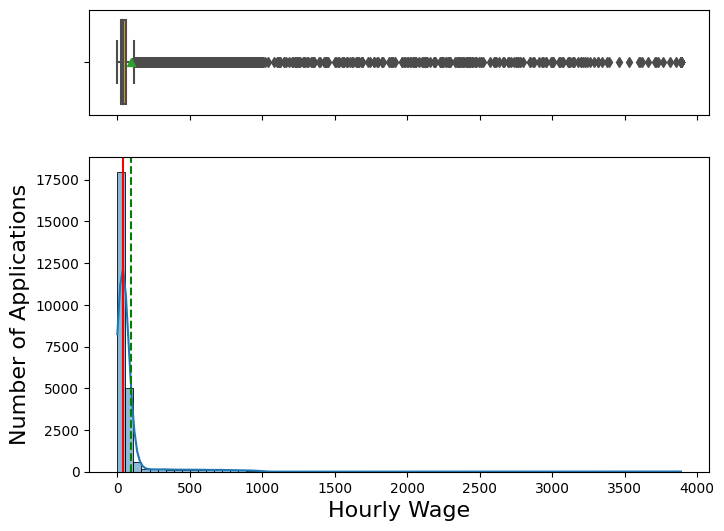

In [19]:
histogram_boxplot(
    data=df_1,
    feature="hourly_wage",
    xlabel="Hourly Wage",
    ylabel="Number of Applications",
    kde=True,
    bins=70,
)

###Observations
- The distribution of the computed equivalent hourly wage is highly right-skewed and the majority of the applications are for the positions with less than 100 (dollars) of equivalent hourly wage.
- Since there are certain positions in certain industries that are paid millions of dollars per year, the detected outliers are not actual outliers.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations